In [333]:
import pandas as pd
import openpyxl as xl

In [334]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/BreachSongs2.xlsx'
df= pd.read_excel(file_path)

In [335]:
df.head()

,Unnamed: 0,album_release_date,minssecs,secs,track_name,track_number,album_name,Lyrics,Lyric source,TEXTJOIN,TEXTSPLIT,TEXTSPLIT2,UNIQUE,COUNTIF,Sort,SortBy,Unique2,Count,Unnamed: 18
0,1.0,2025-09-12 00:00:00,05:22:00,322,City Walls,1,Breach: Digital Remains,"Square up with me, I can take your right, thro...",1,"Square up with me, I can take your right, thro...",Square,Square,Square,2,26,Square,Square,2.0,26
1,NaN,NaN,NaN,NaN,City Walls,NaN,NaN,NaN,NaN,NaN,up,up,up,5,20,up,up,5.0,20
2,NaN,NaN,NaN,NaN,City Walls,NaN,NaN,NaN,NaN,NaN,with,with,with,5,16,with,with,5.0,16
3,NaN,NaN,NaN,NaN,City Walls,NaN,NaN,NaN,NaN,NaN,"me,",me,"me,",4,14,me,"me,",4.0,14
4,NaN,NaN,NaN,NaN,City Walls,NaN,NaN,NaN,NaN,NaN,I,I,I,20,12,I,I,20.0,12


In [336]:
df.columns = df.columns.str.lower()
# Apply lowercase to every cell (handles non-strings with a check)
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [337]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['album_release_date', 'minssecs', 'secs', 'track_name', 'track_number', 'album_name', 'lyrics', 'lyric source', 'textjoin', 'textsplit', 'textsplit2', 'unique', 'countif', 'sort', 'sortby', 'unique2', 'unnamed: 18']
Numerical columns: ['unnamed: 0', 'count']


In [338]:
df[cat_col].nunique()

album_release_date      2
minssecs                8
secs                    8
track_name              7
track_number            8
album_name              2
lyrics                  8
lyric source            2
textjoin                8
textsplit             579
textsplit2            514
unique                579
countif                27
sort                   27
sortby                185
unique2               190
unnamed: 18            17
dtype: int64

In [339]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

unnamed: 0            99.71
album_release_date    99.67
minssecs              99.67
secs                  99.67
track_name             0.00
track_number          99.67
album_name            99.67
lyrics                99.67
lyric source          99.67
textjoin              99.67
textsplit              0.49
textsplit2             7.69
unique                67.54
countif                0.00
sort                   0.00
sortby                 0.16
unique2                0.08
count                 82.83
unnamed: 18           82.58
dtype: float64

In [340]:
# 1. Strip whitespace (removes hidden spaces at the start or end)
df['unique'] = df['unique'].str.strip()

# 2. Standardize Case (optional - makes everything lowercase so 'Value' and 'value' match)
df['unique'] = df['unique'].str.lower()

# 3. Handle Missing Values (replaces empty cells with "Unknown" or similar)
df['unique'] = df['unique'].fillna('unknown')

# 4. Remove special characters (optional - keeps only alphanumeric characters)
# df['unique'] = df['unique'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

print("Cleaning complete.")

Cleaning complete.


In [341]:
# 1. Filter the rows where 'track_name' is 'citywalls'
# 2. Select the 'unique' column
# 3. Use value_counts() to get counts of each unique value
results = df[df['track_name'] == 'city walls']['unique'].value_counts()

print("Unique values and their counts:")
print(results)

Unique values and their counts:
unique
unknown    254
me           3
sun          2
try          2
time         2
          ... 
wanted       1
show         1
way          1
around       1
soul         1
Name: count, Length: 157, dtype: int64


In [342]:
# 1. Strip whitespace (removes hidden spaces at the start or end)
df['unique'] = df['unique'].str.strip()

# 3. Handle Missing Values (replaces empty cells with "Unknown" or similar)
df['unique'] = df['unique'].fillna('unknown')

# 4. Remove special characters (optional - keeps only alphanumeric characters)
# df['unique'] = df['unique'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

print("Cleaning complete.")

Cleaning complete.


In [343]:
# Filter for: Track is citywalls AND length >= 3 AND value is not 'unknown'
final_df=df.copy()
final_df = df[
    (df['track_name'] == 'city walls') &
    (df['unique'].str.len() >= 3) &
    (df['unique'] != 'unknown')
]

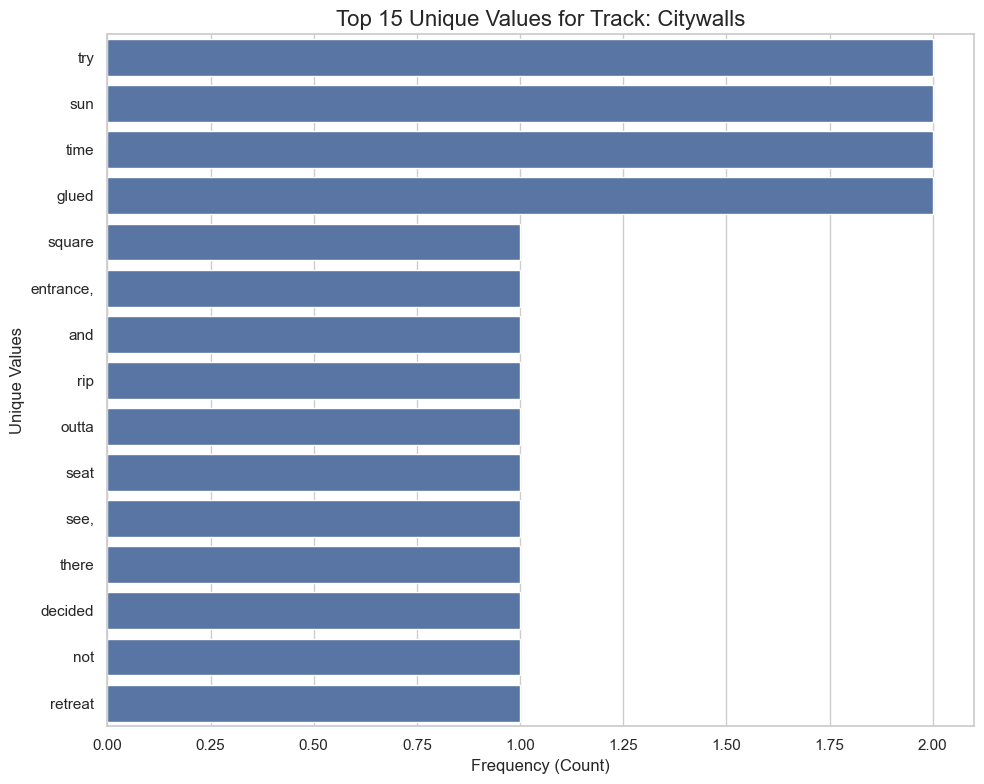

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

top_15 = final_df.copy()
# 1. Get the top 15 counts
top_15 = final_df[final_df['track_name'] == 'city walls']['unique'].value_counts().head(15)

# 2. Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# 3. Create the horizontal bar chart
sns.barplot(x=top_15.values, y=top_15.index)

# 4. Add labels and title
plt.title('Top 15 Unique Values for Track: Citywalls', fontsize=16)
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('Unique Values', fontsize=12)

# 5. Show the plot
plt.tight_layout()
plt.show()

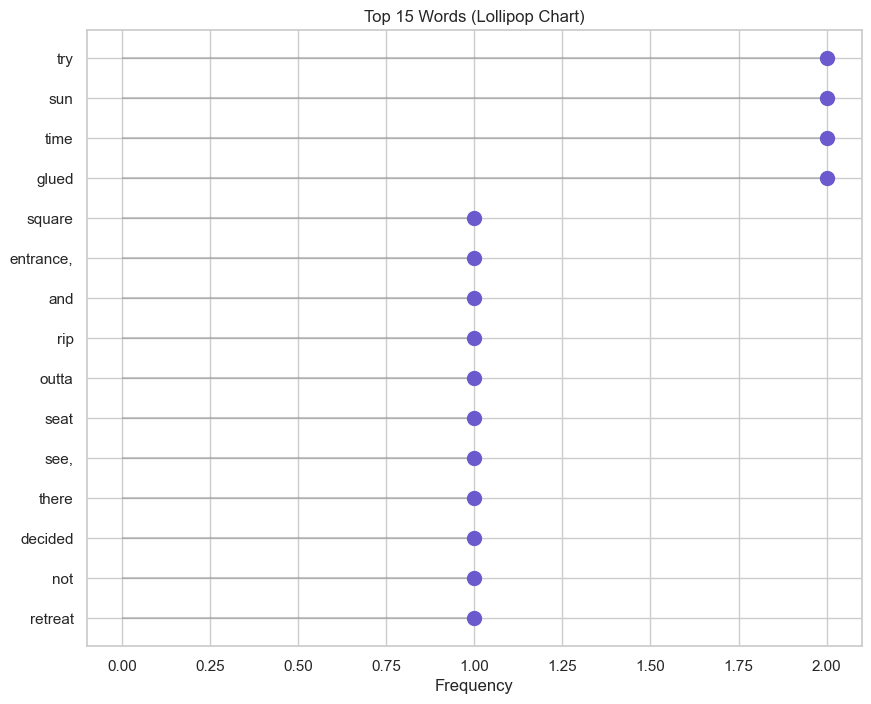

In [345]:
plt.figure(figsize=(10, 8))
plt.hlines(y=top_15.index, xmin=0, xmax=top_15.values, color='grey', alpha=0.4)
plt.plot(top_15.values, top_15.index, "o", markersize=10, color='slateblue')
plt.title('Top 15 Words (Lollipop Chart)')
plt.xlabel('Frequency')
plt.gca().invert_yaxis() # Put the highest count at the top
plt.show()

In [346]:
# Filter for 'citywalls' AND where 'unique' is 'unknown'
unknown_df = df[(df['track_name'] == 'city walls') & (df['unique'] == 'unknown')]

print(f"Total 'unknown' entries found: {len(unknown_df)}")
print("\n--- List of Unknown Values ---")
print(unknown_df['unique'].to_list())

Total 'unknown' entries found: 254

--- List of Unknown Values ---
['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown

In [347]:
# Find rows that were originally empty in the Excel file
originally_empty = df[(df['track_name'] == 'citywalls') & (df['unique'].isnull())]
originally_empty

,unnamed: 0,album_release_date,minssecs,secs,track_name,track_number,album_name,lyrics,lyric source,textjoin,textsplit,textsplit2,unique,countif,sort,sortby,unique2,count,unnamed: 18


In [348]:
# 1. Ensure the column is treated as a string
df['unique'] = df['unique'].astype(str)

# 2. Filter: Keep rows where length of 'unique' is 3 or more
# We also keep the 'track_name' == 'citywalls' filter
filtered_df = df[(df['track_name'] == 'city walls') & (df['unique'].str.len() >= 3)]

# 3. Get the new unique value count
print(f"Total unique values (3+ letters): {filtered_df['unique'].nunique()}")
print(filtered_df['unique'].value_counts().head(15))

Total unique values (3+ letters): 140
unique
unknown      254
try            2
sun            2
time           2
glued          2
square         1
entrance,      1
rip            1
outta          1
seat           1
see,           1
not            1
there          1
send           1
retreat        1
Name: count, dtype: int64


In [349]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once"
]

In [350]:
# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply to your column
df1=filtered_df.copy()
df1['unique'] = df1['unique'].apply(remove_stopwords)

### City Walls

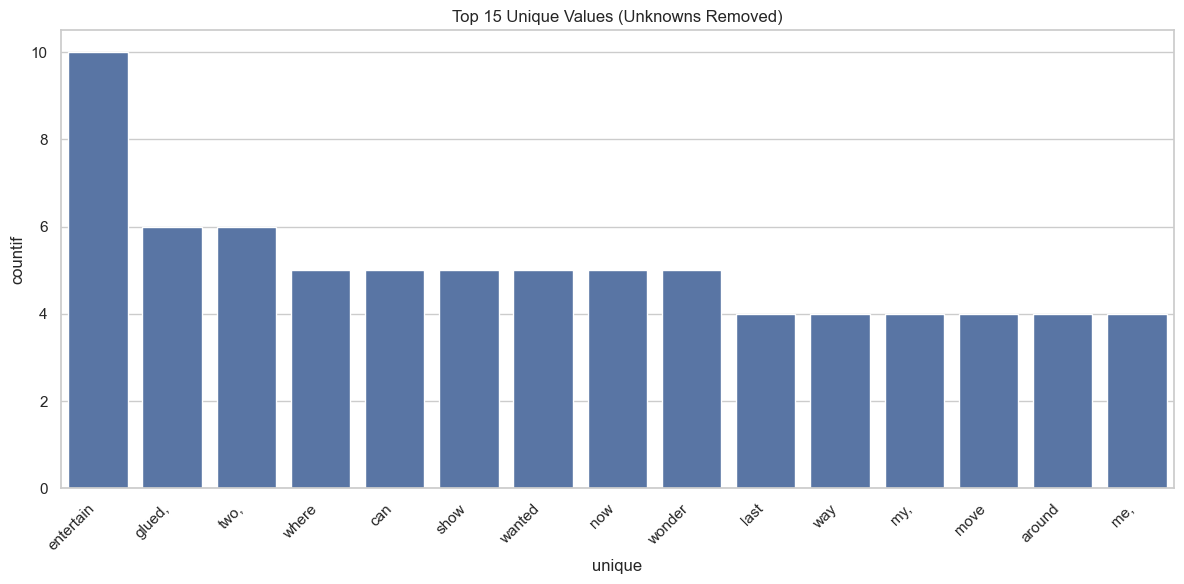

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for the specific track
filtered_data = df1[df1['track_name'].str.strip() == 'city walls'].copy()

# 2. AGGRESSIVE CLEAN & REMOVE UNKNOWNS:
# We strip spaces and check if the word "unknown" is in the string at all
filtered_data = filtered_data[
    ~filtered_data['unique'].str.lower().str.strip().str.contains('unknown', na=False)
]

# (Optional) If they are appearing as empty strings or "nan"
filtered_data = filtered_data[filtered_data['unique'].str.strip() != ""]

# 3. Sort by 'countif' and take the top 15
df_top15 = filtered_data.sort_values(by='countif', ascending=False).head(15)

# 4. Create the Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top15,
    x='unique',
    y='countif',
)

plt.title("Top 15 Unique Values (Unknowns Removed)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [352]:
# Now your counts will work without the TypeError
top_15 = df_top15.copy()
top_15 = df_top15[df_top15['track_name'] == 'city walls']['unique'].value_counts().head(15)

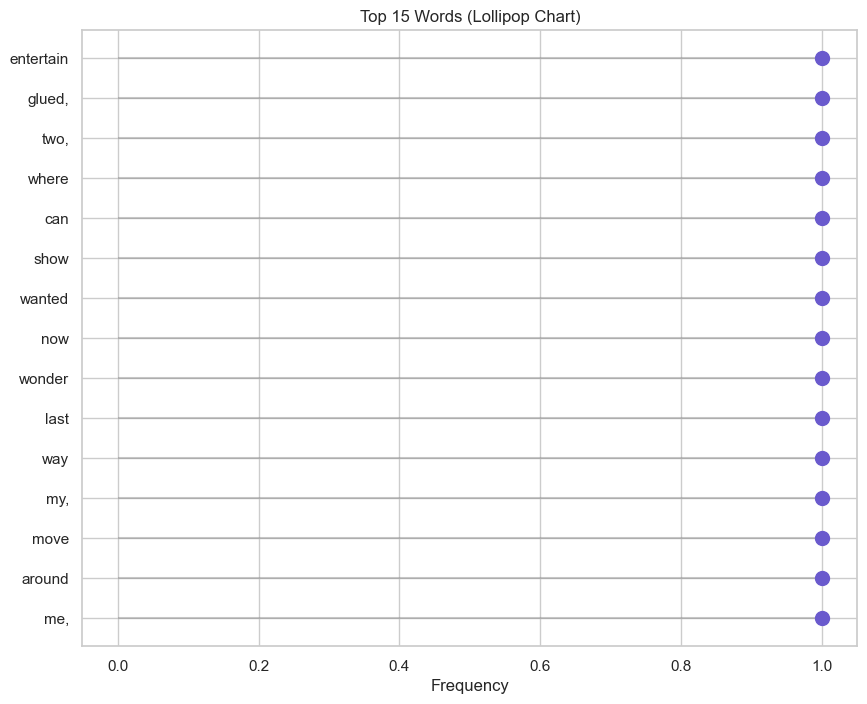

In [353]:
import numpy as np
plt.figure(figsize=(10, 8))
plt.hlines(y=top_15.index, xmin=0, xmax=top_15.values, color='grey', alpha=0.4)
plt.plot(top_15.values, top_15.index, "o", markersize=10, color='slateblue')
plt.title('Top 15 Words (Lollipop Chart)')
plt.xlabel('Frequency')
plt.gca().invert_yaxis() # Put the highest count at the top
plt.show()

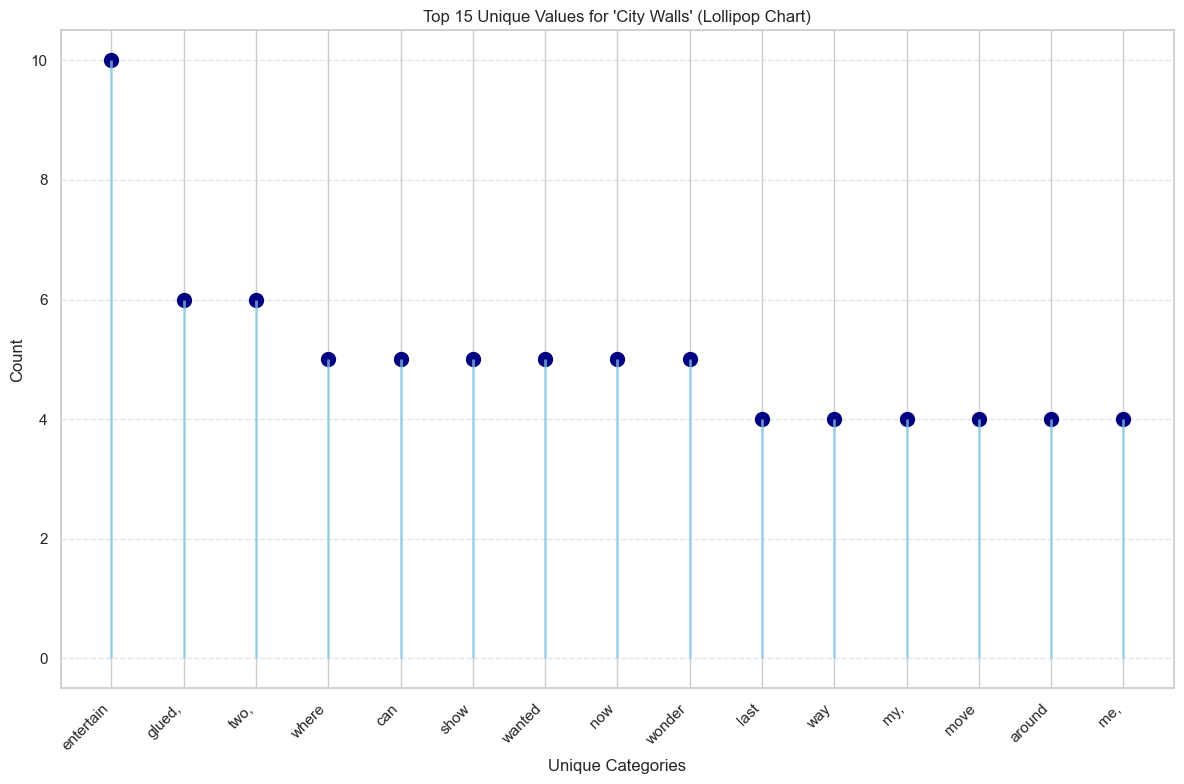

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1, 2, 3: (Keep your existing filtering and sorting logic)
# Ensure df_top15 is ready as per your previous script

# 4. Create the Lollipop Chart
plt.figure(figsize=(12, 8))

# Create the vertical stems (lines)
# x = the categories, ymin = start at 0, ymax = the count value
plt.vlines(x=df_top15['unique'], ymin=0, ymax=df_top15['countif'], color='skyblue', alpha=0.7, linewidth=2)

# Create the "lollipops" (dots) on top
plt.scatter(df_top15['unique'], df_top15['countif'], color='navy', s=100, alpha=1)

# Formatting
plt.title("Top 15 Unique Values for 'City Walls' (Lollipop Chart)")
plt.xlabel("Unique Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5) # Optional: adds horizontal grid lines for readability

plt.tight_layout()
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stop words list (only need to do this once)
nltk.download('stopwords')

# Create the list
stop_words = stopwords.words('english')

print(f"Total stop words: {len(stop_words)}")
print(stop_words[:10])  # See the first 10